# CASE: Car Industry

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

## 1- Data Reading: 


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
import plotly.express as px

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from google.colab import files
uploaded = files.upload()

Saving auto_industry.csv to auto_industry.csv


In [11]:
df=pd.read_csv('/content/auto_industry.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [12]:
df.shape

(398, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Exploring the data

In [15]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

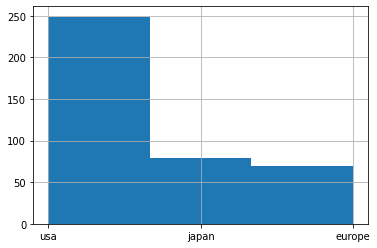

In [ ]:
df['origin'].hist(bins=3)

In [ ]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5])

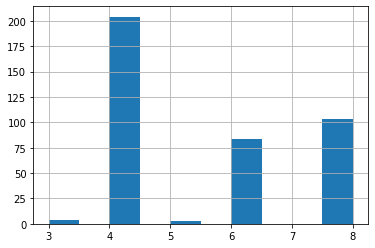

In [ ]:
df['cylinders'].hist(bins=10)

## 2- Missing Values

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
#Trazer os valores nulos
df.loc[df['horsepower'].isnull(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


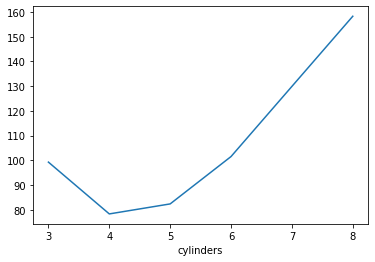

In [ ]:
mpg_acceleration = df.groupby('cylinders')['horsepower'].mean().plot()

In [ ]:
medias=df.groupby(['cylinders', 'model_year'])['horsepower'].mean()
medias

cylinders  model_year
3          72             97.000000
           73             90.000000
           77            110.000000
           80            100.000000
4          70             87.714286
           71             77.583333
           72             85.142857
           73             82.909091
           74             74.000000
           75             84.916667
           76             75.600000
           77             78.785714
           78             79.705882
           79             75.750000
           80             74.043478
           81             72.950000
           82             79.148148
5          78            103.000000
           79             77.000000
           80             67.000000
6          70             91.750000
           71             98.875000
           73            102.125000
           74            101.666667
           75             96.750000
           76             98.700000
           77            102.000000
      

In [ ]:
# Também poderia ser usando o pivot table :
df.pivot_table(index='model_year', columns='cylinders', values='horsepower', aggfunc=np.mean).round(2) 


cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,87.71,NaN,91.75,183.67
71,NaN,77.58,NaN,98.88,166.86
72,97.0,85.14,NaN,NaN,159.69
73,90.0,82.91,NaN,102.12,170.00
74,NaN,74.00,NaN,101.67,146.00
75,NaN,84.92,NaN,96.75,142.00
76,NaN,75.60,NaN,98.70,146.33
77,110.0,78.79,NaN,102.00,152.38
78,NaN,79.71,103.0,109.83,135.50


In [ ]:
# preenchi cada Nan de acordo com a cilindrada e ano do modelo.
df = df.fillna(df.groupby(['cylinders','model_year']).transform('mean'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


In [ ]:
df.iloc[126]

mpg                      21.0
cylinders                   6
displacement            200.0
horsepower         101.666667
weight                   2875
acceleration             17.0
model_year                 74
origin                    usa
name            ford maverick
Name: 126, dtype: object

## 3 - Even Years Analysis


In [ ]:
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
df.groupby('model_year').describe()


In [ ]:
test= df.value_counts(df['model_year'] %2==0)
test

model_year
True     214
False    184
dtype: int64

In [ ]:
#or
model_anos_pares = df.loc[df['model_year'] % 2 == 0]
model_anos_pares


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
print(f"{len(model_anos_pares)} modelos foram lançados em anos pares.")

214 modelos foram lançados em anos pares.


## 4- Creating a column 


In [ ]:
# Nova coluna com Split da coluna "name" separado por espaços
col_name= df["name"].str.split(pat=" ", n = 1, expand = True)

# Criando a Nova Coluna "First Name" com o new[0]
df["Marca"]= col_name[0] 

# Criando a Nova Coluna "Last Name" com o new[1]
df["Nome carro"]= col_name[1] 

# Retirando a antiga coluna "Name" 
df.drop(columns =["name"], inplace = True) 

# Imprimindo Alteração no Console
print(df)


      mpg  cylinders  displacement  ...  origin      Marca       Nome carro
0    18.0          8         307.0  ...     usa  chevrolet  chevelle malibu
1    15.0          8         350.0  ...     usa      buick      skylark 320
2    18.0          8         318.0  ...     usa   plymouth        satellite
3    16.0          8         304.0  ...     usa        amc        rebel sst
4    17.0          8         302.0  ...     usa       ford           torino
..    ...        ...           ...  ...     ...        ...              ...
393  27.0          4         140.0  ...     usa       ford       mustang gl
394  44.0          4          97.0  ...  europe         vw           pickup
395  32.0          4         135.0  ...     usa      dodge          rampage
396  28.0          4         120.0  ...     usa       ford           ranger
397  31.0          4         119.0  ...     usa      chevy             s-10

[398 rows x 10 columns]


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino


In [ ]:
#Verificando os nomes
pd.DataFrame(df['Marca'].value_counts())

,Marca
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16
volkswagen,15


In [ ]:
#Alguns nomes significam a mesma marca, então corrigindo:
df.loc[df['Marca'] == 'chevroelt' ,'Marca'] = 'chevrolet'
df.loc[df['Marca'] == 'chevy' ,'Marca'] = 'chevrolet'
df.loc[df['Marca'] == 'vw' ,'Marca'] = 'volkswagen'
df.loc[df['Marca'] == 'vokswagen' ,'Marca'] = 'volkswagen'

# Verificação :
pd.DataFrame(df['Marca'].value_counts())

,Marca
ford,51
chevrolet,47
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
volkswagen,22
buick,17
pontiac,16


## 5- Correlation

In [ ]:
#Com esse comando, vemos que a correlação parece ser fraca..
df['mpg'].corr(df['acceleration']).round(5)


0.42029

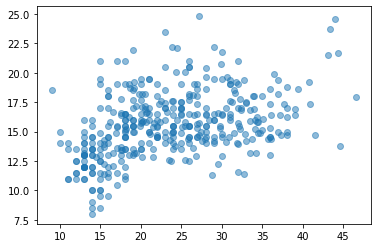

In [ ]:
X = df['mpg']
Y = df['acceleration']
plt.scatter(X,Y, alpha=0.5) # alpha é a transparência 
plt.show()

## 6 - Analysis with get_group()

In [ ]:
df.groupby('origin').get_group('usa')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet,camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford,mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford,ranger


## 7- Duplicate elements, creating a new column and changing names in the Data frame

### Removing duplicates

In [ ]:
# Não temos nenhuma linha exatamente igual a outra 
df.duplicated().sum()

0

In [ ]:
#Mas se separarmos pelo nome e modelo do carro temos:
df[['Nome carro', 'model_year']].duplicated().sum()

4

In [ ]:
# Descobrindo quem são esses duplicados
df[df[['Nome carro', 'model_year']].duplicated() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford,pinto
203,29.5,4,97.0,71.0,1825,12.2,76,europe,volkswagen,rabbit
332,29.8,4,89.0,62.0,1845,15.3,80,europe,volkswagen,rabbit
342,30.0,4,135.0,84.0,2385,12.9,81,usa,plymouth,reliant


In [ ]:
# Vou dar um drop nessas linhas pois o enunciado diz para fazê-lo. 
#Porém em outras situações eu iria analisar e comparar para ver qual faria mais sentido para seguir no data frame
df.drop_duplicates(keep='first', inplace=True)

###Creating a Consumption Column [Km/L] 

Pesquisando encontrei que mpg x 0, 

In [ ]:
df['Consumo (Km/L)'] = df['mpg']*0.425144
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro,Consumo (Km/L)
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,chevelle malibu,7.652592
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,skylark 320,6.377160
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,satellite,7.652592
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,rebel sst,6.802304
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,torino,7.227448


### Changing the Country names

In [ ]:
df['origin'] = df['origin'].str.title()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro,Consumo (Km/L)
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu,7.652592
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320,6.377160
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite,7.652592
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst,6.802304
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford,torino,7.227448


##  8- Analysis with pivot_table()

Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [ ]:
table_1 = pd.pivot_table(data=df,index=['model_year','cylinders'])
pd.DataFrame(table_1['mpg'])
# poderia ser tb assim : df.pivot_table(index=['model_year','cylinders'])

mpg
model_year cylinders           
70         4          25.285714
           6          20.500000
           8          14.111111
71         4          27.461538
           6          18.000000
           8          13.428571
72         3          19.000000
           4          23.428571
           8          13.615385
73         3          18.000000
           4          22.727273
           6          19.000000
           8          13.200000
74         4          27.800000
           6          17.857143
           8          14.200000
75         4          25.250000
           6          17.583333
           8          15.666667
76         4          26.766667
           6          20.000000
           8          14.666667
77         3          21.500000
           4          29.107143
           6          19.500000
           8          16.000000
78         4          29.576471
           5          20.300000
           6          19.066667
           8          19.050000
79         4          31.525000
           5          25.400000
           6          22.950000
           8          18.630000
80         3          23.700000
           4          34.612000
           5          36.400000
           6          25.900000
81         4          32.814286
           6          23.428571
           8          26.600000
82         4          32.071429
           6          28.333333

In [ ]:
# Outra maneira de fazer seria :
df.pivot_table(index='model_year', columns='cylinders', values='mpg').round(2)

cylinders,3,4,5,6,8
model_year,,,,,
70,NaN,25.29,NaN,20.50,14.11
71,NaN,27.46,NaN,18.00,13.43
72,19.0,23.43,NaN,NaN,13.62
73,18.0,22.73,NaN,19.00,13.20
74,NaN,27.80,NaN,17.86,14.20
75,NaN,25.25,NaN,17.58,15.67
76,NaN,26.77,NaN,20.00,14.67
77,21.5,29.11,NaN,19.50,16.00
78,NaN,29.58,20.3,19.07,19.05


## 9- More Analysis with o pivot_table() 

Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [ ]:
df.pivot_table(index='origin', columns='cylinders', values='horsepower',aggfunc=np.mean).round(2)

cylinders,3,4,5,6,8
origin,,,,,
Europe,NaN,78.16,82.33,113.50,NaN
Japan,99.25,75.58,NaN,115.83,NaN
Usa,NaN,80.79,NaN,99.70,158.3


## 10- More Analysis with o pivot_table() with a range

Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

In [ ]:
# Criar faixas de anos dividindo em 6 iguais 
anos = pd.cut(df['model_year'], 6, precision = 0, include_lowest=True)
df_10=df.pivot_table(index=['origin','cylinders'],columns= anos, values = 'mpg', aggfunc=np.mean).round(2)
df_10


model_year        (69.0, 72.0]  (72.0, 74.0]  ...  (78.0, 80.0]  (80.0, 82.0]
origin cylinders                              ...                            
Europe 4                 25.07         25.38  ...         35.96         35.12
       5                   NaN           NaN  ...         30.90           NaN
       6                   NaN           NaN  ...           NaN         30.70
Japan  3                 19.00         18.00  ...         23.70           NaN
       4                 27.10         27.25  ...         36.13         34.73
       6                   NaN         20.00  ...         32.70         24.80
Usa    4                 24.00         23.80  ...         29.10         30.06
       6                 18.83         18.36  ...         22.40         24.10
       8                 13.82         13.40  ...         18.63         26.60

[9 rows x 6 columns]

In [ ]:
# Na Europa
df_eur = df.loc[df['origin'] == 'Europe']
anos_2 = pd.cut(df_eur['model_year'], 6, precision = 0, include_lowest=True)
df_eur_2=df_eur.pivot_table(index=['origin','cylinders'],columns= anos_2, values = 'mpg', aggfunc=np.mean).round(2)
df_eur_2

model_year        (69.0, 72.0]  (72.0, 74.0]  ...  (78.0, 80.0]  (80.0, 82.0]
origin cylinders                              ...                            
Europe 4                 25.07         25.38  ...         35.96         35.12
       5                   NaN           NaN  ...         30.90           NaN
       6                   NaN           NaN  ...           NaN         30.70

[3 rows x 6 columns]

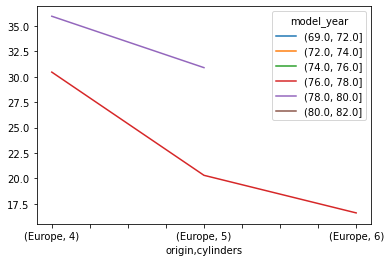

In [ ]:
df_eur_2.plot()

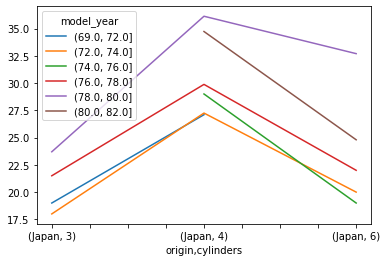

In [ ]:
# Japão
df_jap = df.loc[df['origin'] == 'Japan']
anos_jap = pd.cut(df_jap['model_year'], 6, precision = 0, include_lowest=True)
df_jap_2=df_jap.pivot_table(index=['origin','cylinders'],columns= anos_jap, values = 'mpg', aggfunc=np.mean).round(2)
df_jap_2.plot()

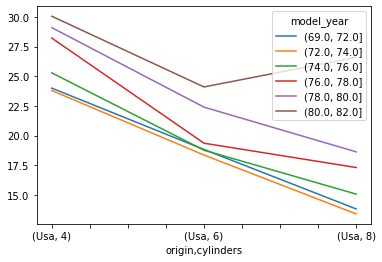

In [ ]:
# USA
df_usa = df.loc[df['origin'] == 'Usa']
anos_usa = pd.cut(df_usa['model_year'], 6, precision = 0, include_lowest=True)
df_usa_2=df_usa.pivot_table(index=['origin','cylinders'],columns= anos_usa, values = 'mpg', aggfunc=np.mean).round(2)
df_usa_2.plot()

## 11- Creating a new column based on data from the table 

 Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

- There are several ways to do it, **1**:


In [ ]:
df['regiao mundial'] = df['origin'].replace(['Usa', 'Europe', 'Japan'], ['America do Norte', 'Europa', 'Asia Oriental'])
df.tail(10)

NameError: ignored

- **2:**

In [ ]:
country_zone = {
    'Japan' : 'Asia',
    'Europe' : 'Europe',
    'Usa' : 'North America'
}
df['zone'] = df['origin'].map(country_zone)
df


# Statistic extra

## 1- centrality, dispersion and distribution of variables


In [ ]:
df.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Consumo (Km/L)
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.10,2970.42,15.57,76.01,10.00
std,7.82,1.70,104.27,38.34,846.84,2.76,3.70,3.32
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,3.83
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00,7.44
50%,23.00,4.00,148.50,92.00,2803.50,15.50,76.00,9.78
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,12.33
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,19.81


## 2- Correlation Matrix and Graph

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Consumo (Km/L)
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58,1.00
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35,-0.78
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.80
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.78
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.83
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29,0.42
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.58
Consumo (Km/L),1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58,1.00


## 3 - Calculate the correlation matrix with a cut-off value

Eliminando os elementos `'origin'`, `'name'`, `'model_year'`, calcule a matriz de correlação entre atributos remanecentes, incluindo apenas aquelas correlações em que o módulo supera o corte de `0.8`, discuta também suas relações de proporcionalidade.

In [ ]:
copia_df = df.drop(['origin', 'model_year'], axis = 1)
copia_df =  df.drop('Nome carro', axis = 1)

In [ ]:
# Método 1 
auto_corr = copia_df.corr()
auto_corr = auto_corr[auto_corr.abs().ge(0.8)]
auto_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Consumo (Km/L)
mpg,1.00,nan,-0.80,nan,-0.83,nan,nan,1.00
cylinders,nan,1.00,0.95,0.84,0.90,nan,nan,nan
displacement,-0.80,0.95,1.00,0.90,0.93,nan,nan,-0.80
horsepower,nan,0.84,0.90,1.00,0.86,nan,nan,nan
weight,-0.83,0.90,0.93,0.86,1.00,nan,nan,-0.83
acceleration,nan,nan,nan,nan,nan,1.00,nan,nan
model_year,nan,nan,nan,nan,nan,nan,1.00,nan
Consumo (Km/L),1.00,nan,-0.80,nan,-0.83,nan,nan,1.00


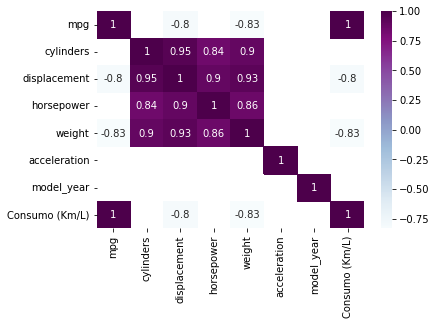

In [ ]:
# Método 2 
copia_df_corr = copia_df.corr()
copia_df_corr.replace(None)
# Fazer uma função
def alta_corr(num):
    if num > 0.8:
        return num
    elif num < -0.8:
        return num
    else:
        return None

# Usar a função
copia_df_corr['mpg'] = copia_df_corr['mpg'].map(alta_corr)
copia_df_corr['cylinders'] = copia_df_corr['cylinders'].map(alta_corr)
copia_df_corr['displacement'] = copia_df_corr['displacement'].map(alta_corr)
copia_df_corr['horsepower'] = copia_df_corr['horsepower'].map(alta_corr)
copia_df_corr['weight'] = copia_df_corr['weight'].map(alta_corr)
copia_df_corr['acceleration'] = copia_df_corr['acceleration'].map(alta_corr)
copia_df_corr

# Gráfico
sn.heatmap(auto_corr, cmap='BuPu', annot=True);

# Extra - DataViz

## 1- Boxplots
Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro,Consumo (Km/L),regiao mundial,zone
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu,7.652592,America do Norte,North America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320,6.377160,America do Norte,North America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite,7.652592,America do Norte,North America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst,6.802304,America do Norte,North America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford,torino,7.227448,America do Norte,North America


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 864x432 with 0 Axes>

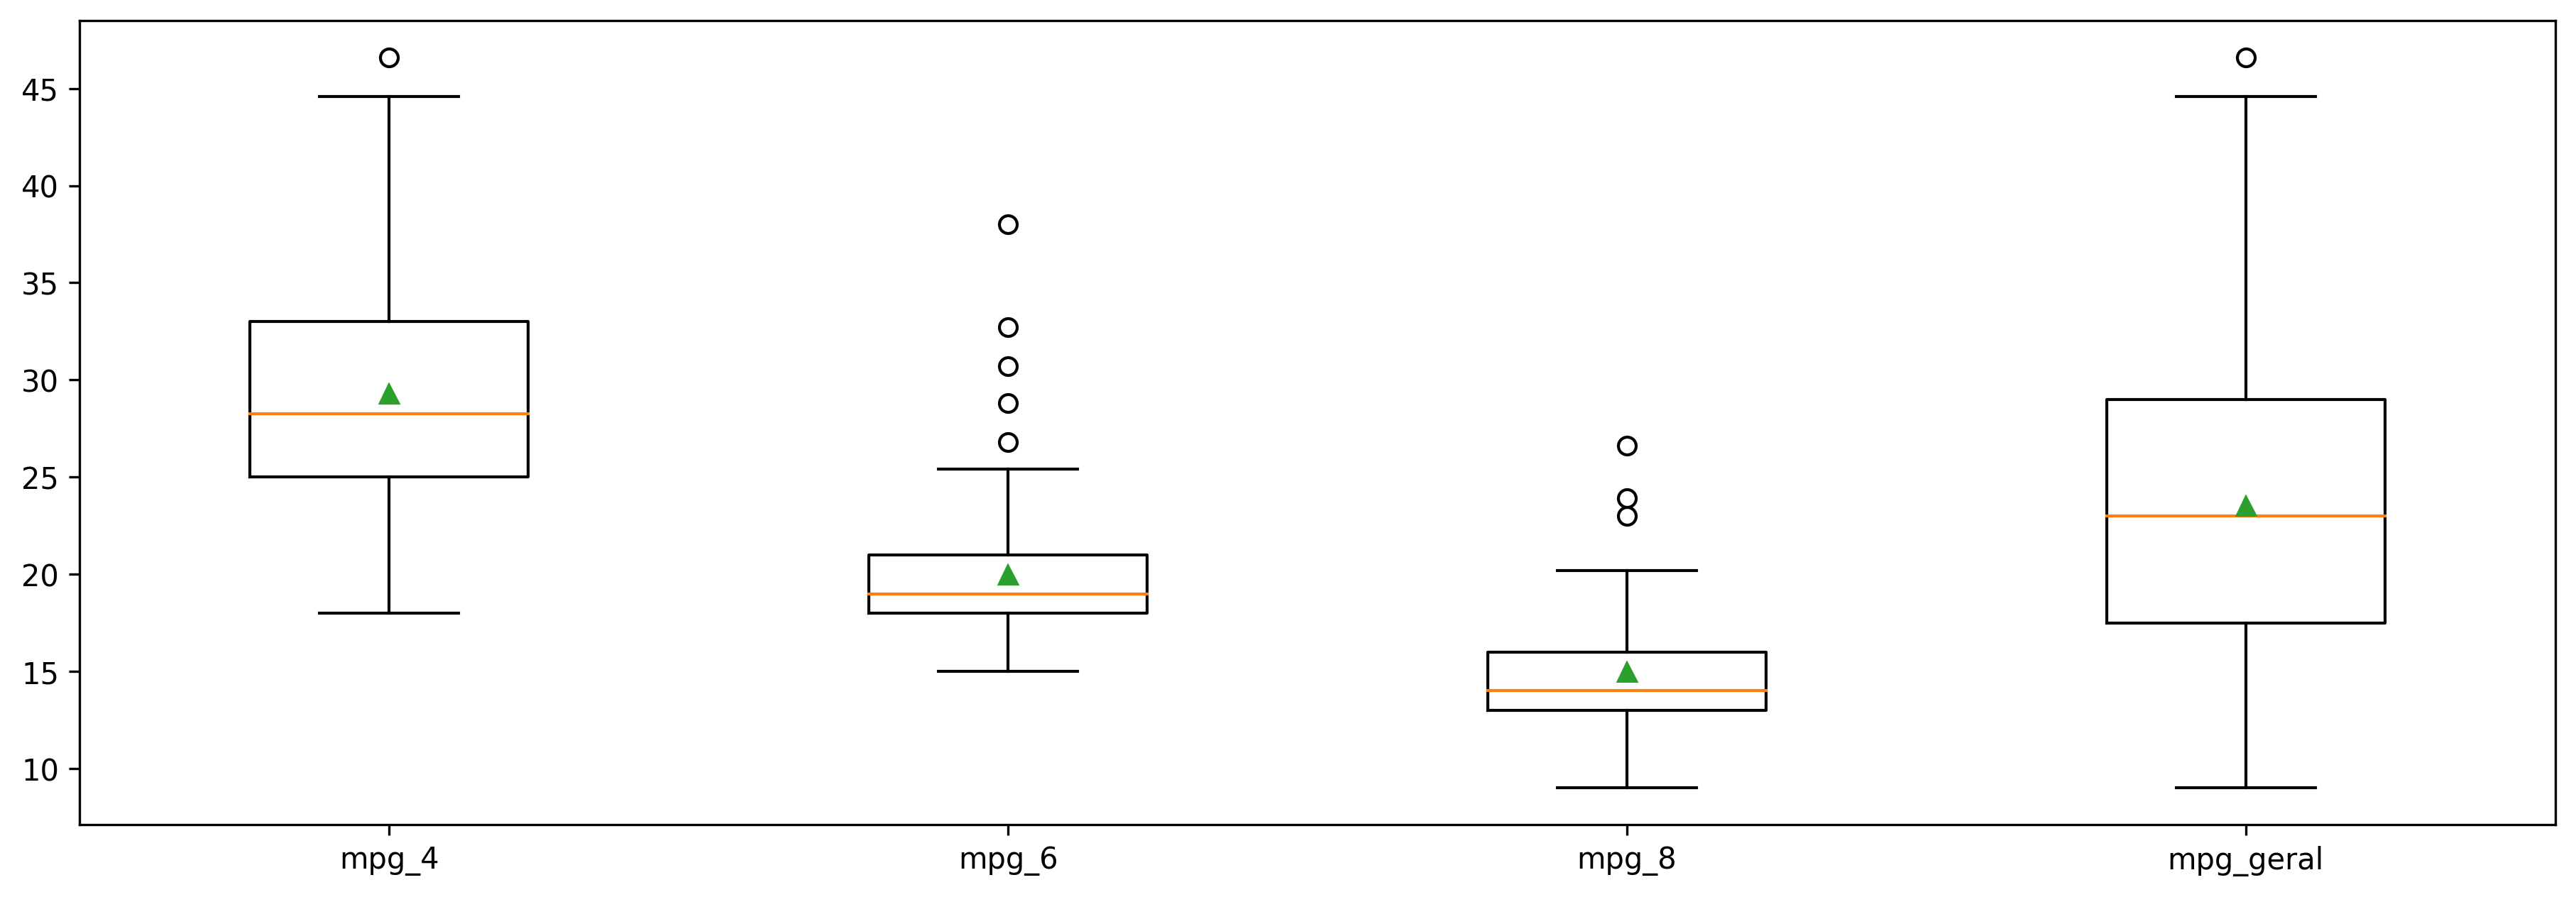

In [ ]:
# Análise  mpg separado por cilindro
plt.figure(1, figsize=(12, 6))

mpg = [df.groupby('cylinders')['mpg'].get_group(4), df.groupby('cylinders')['mpg'].get_group(6), df.groupby('cylinders')['mpg'].get_group(8), df['mpg']]
plt.figure(figsize=(15,5), dpi=300)
plt.boxplot(mpg, labels=['mpg_4', 'mpg_6', 'mpg_8', 'mpg_geral'], showmeans = True, whis = 1.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 864x432 with 0 Axes>

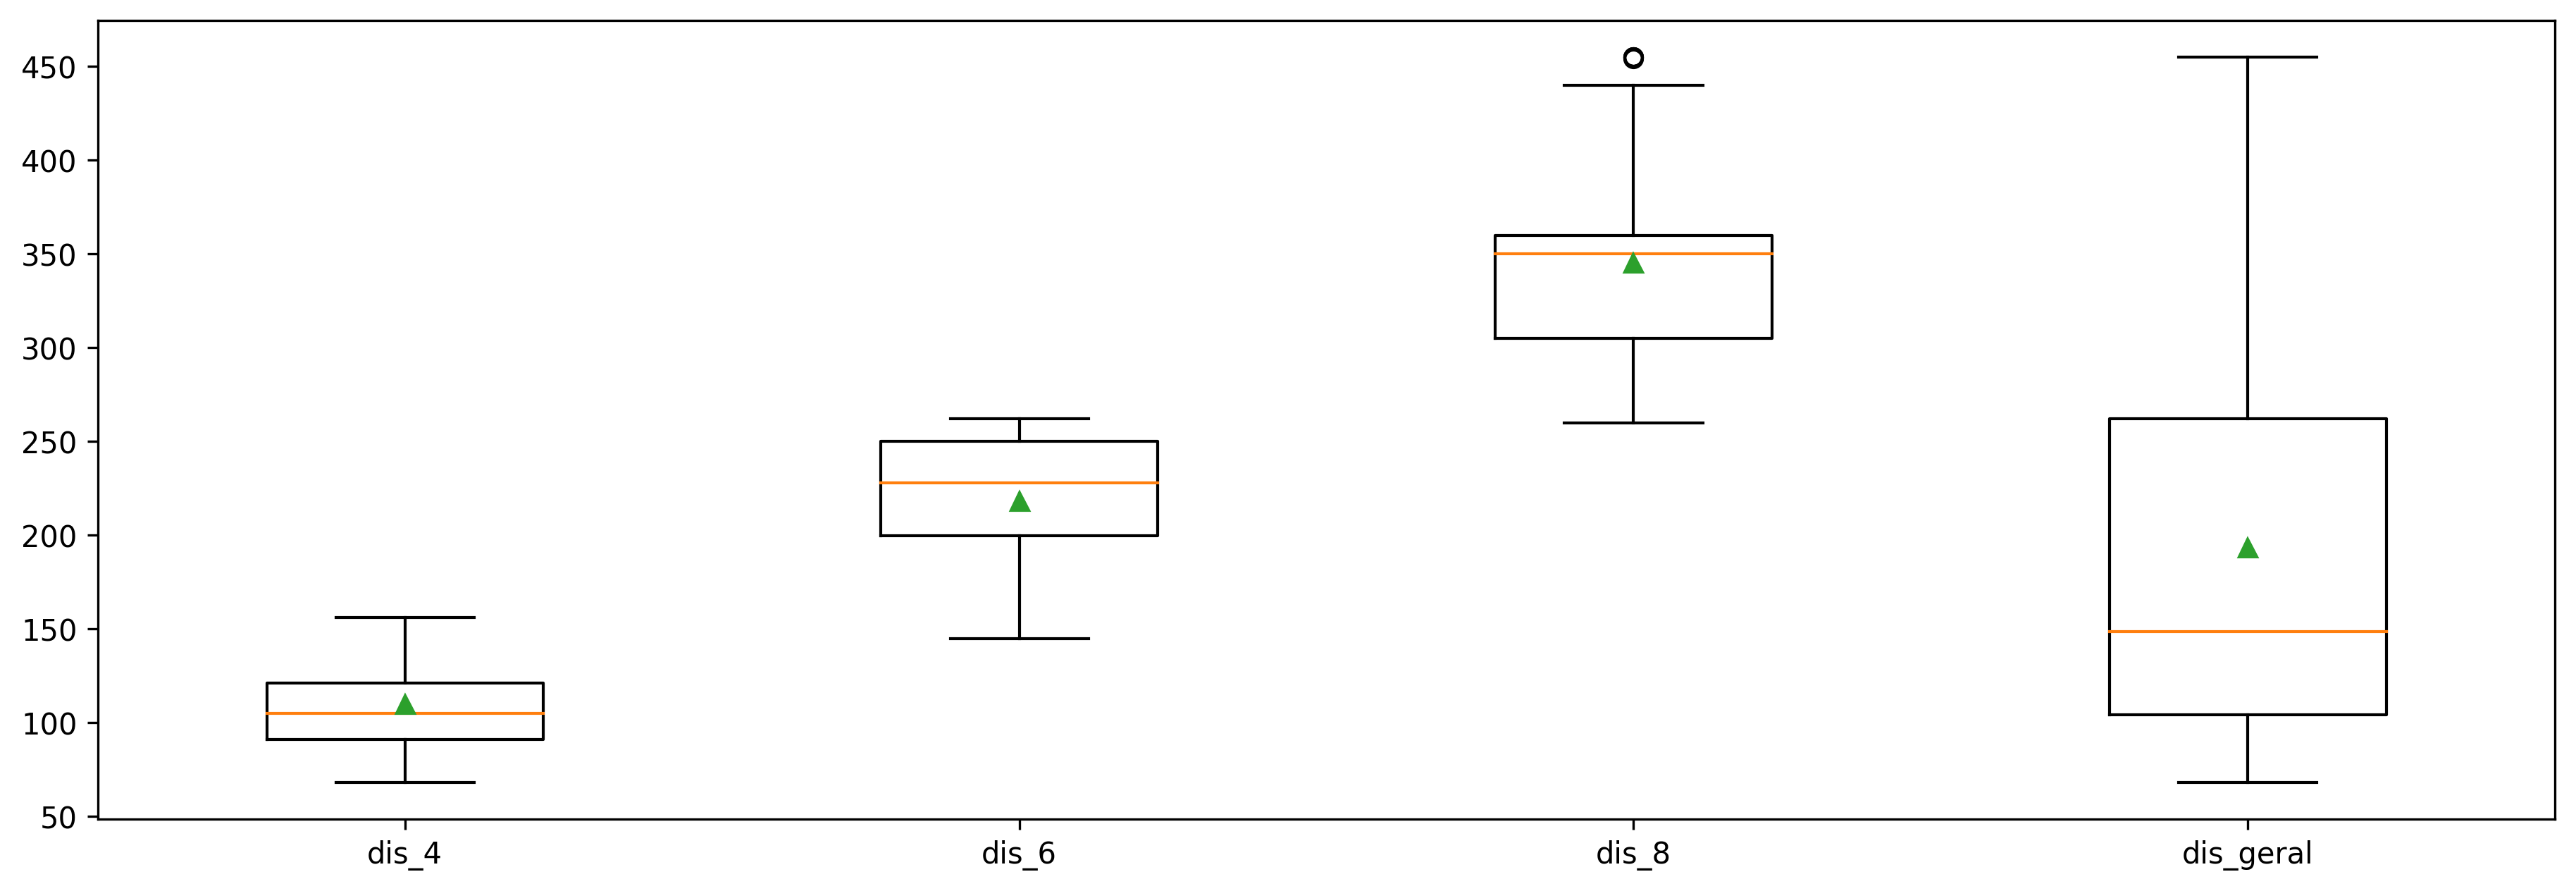

In [ ]:
# Análise  displacement separado por cilindro 
plt.figure(1, figsize=(12, 6))

displacement = [df.groupby('cylinders')['displacement'].get_group(4), df.groupby('cylinders')['displacement'].get_group(6), df.groupby('cylinders')['displacement'].get_group(8), df['displacement']]
plt.figure(figsize=(15,5), dpi=300)
plt.boxplot(displacement, labels=['dis_4', 'dis_6', 'dis_8', 'dis_geral'], showmeans = True, whis = 1.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 864x432 with 0 Axes>

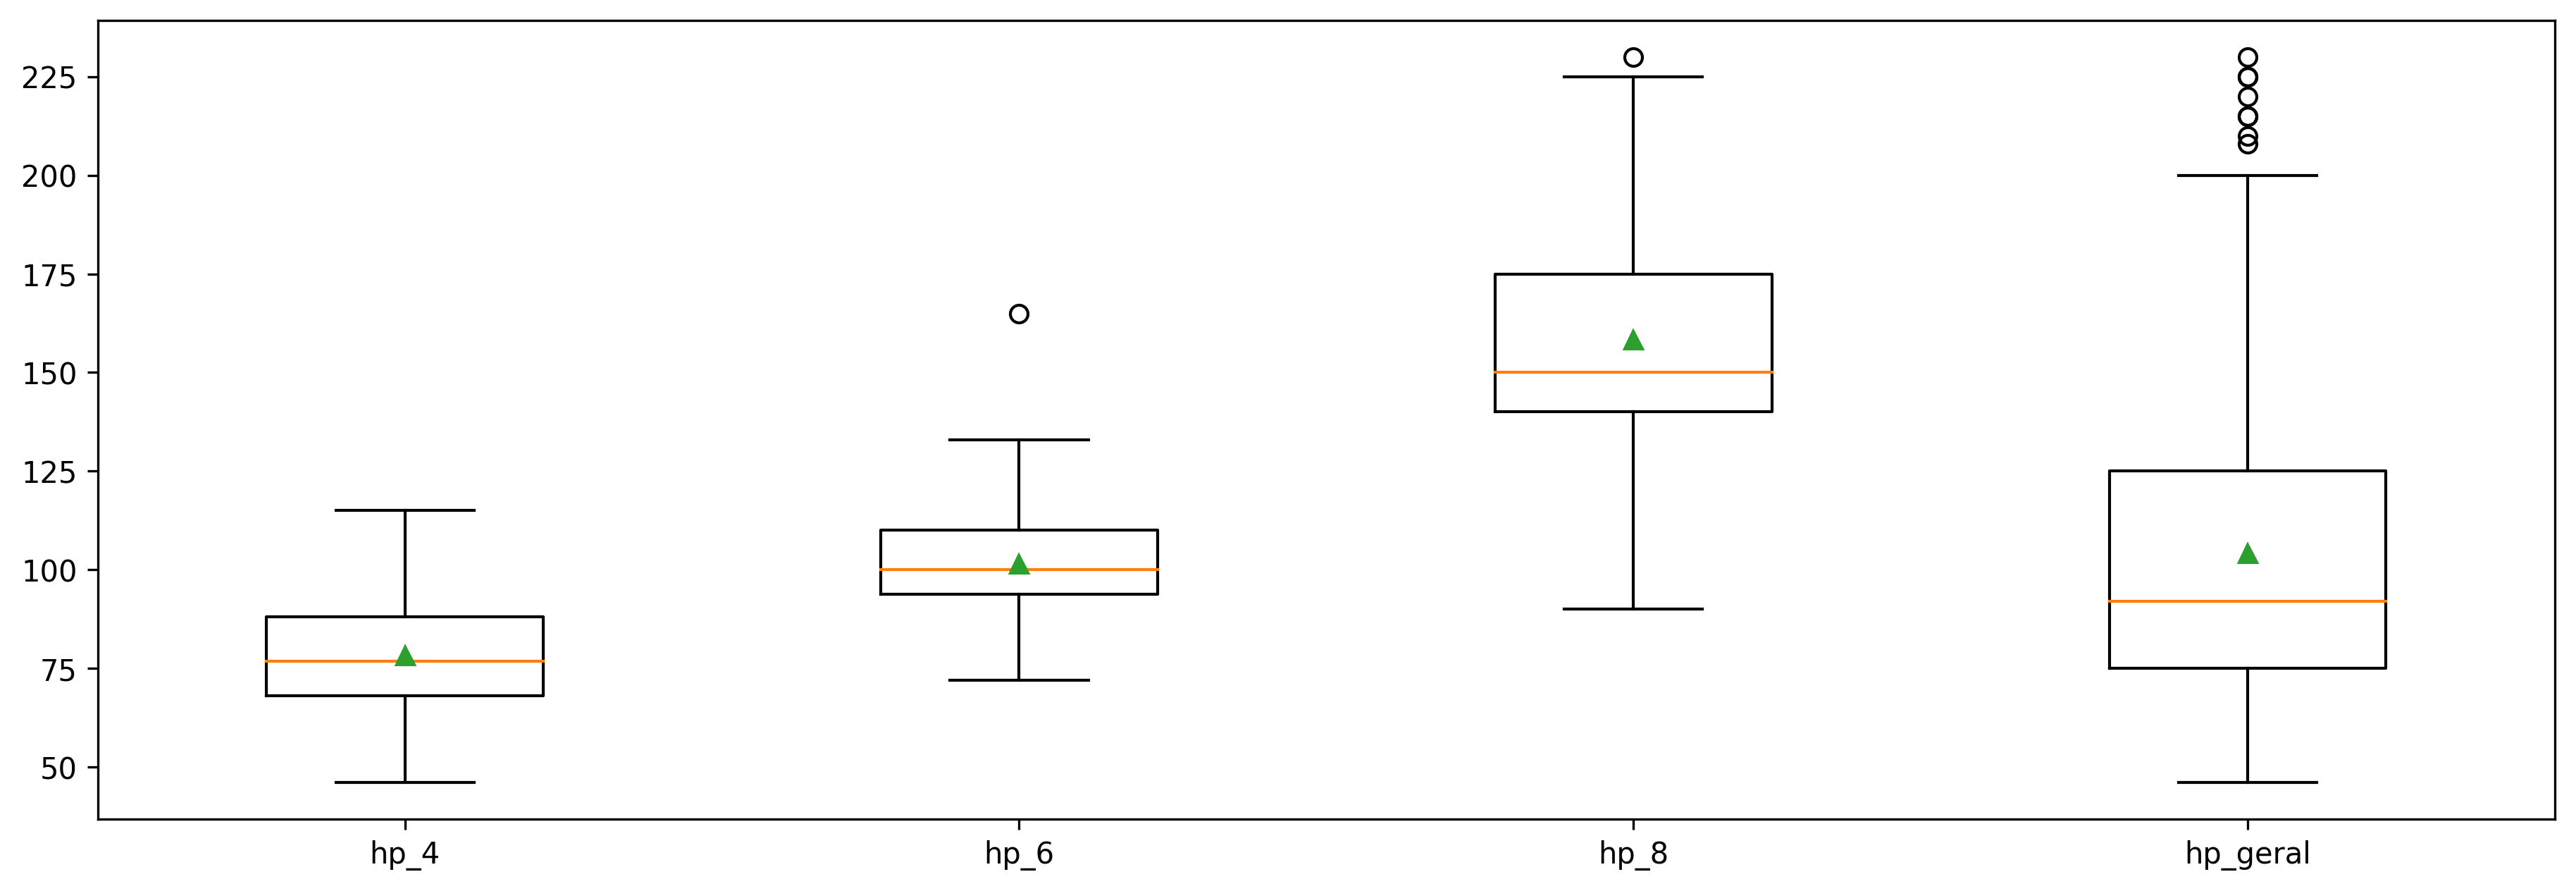

In [ ]:
# Análise  horsepower separado por cilindro 
plt.figure(1, figsize=(12, 6))

horsepower = [df.groupby('cylinders')['horsepower'].get_group(4), df.groupby('cylinders')['horsepower'].get_group(6), df.groupby('cylinders')['horsepower'].get_group(8), df['horsepower']]
plt.figure(figsize=(15,5), dpi=300)
plt.boxplot(horsepower, labels=['hp_4', 'hp_6', 'hp_8', 'hp_geral'], showmeans = True, whis = 1.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 864x432 with 0 Axes>

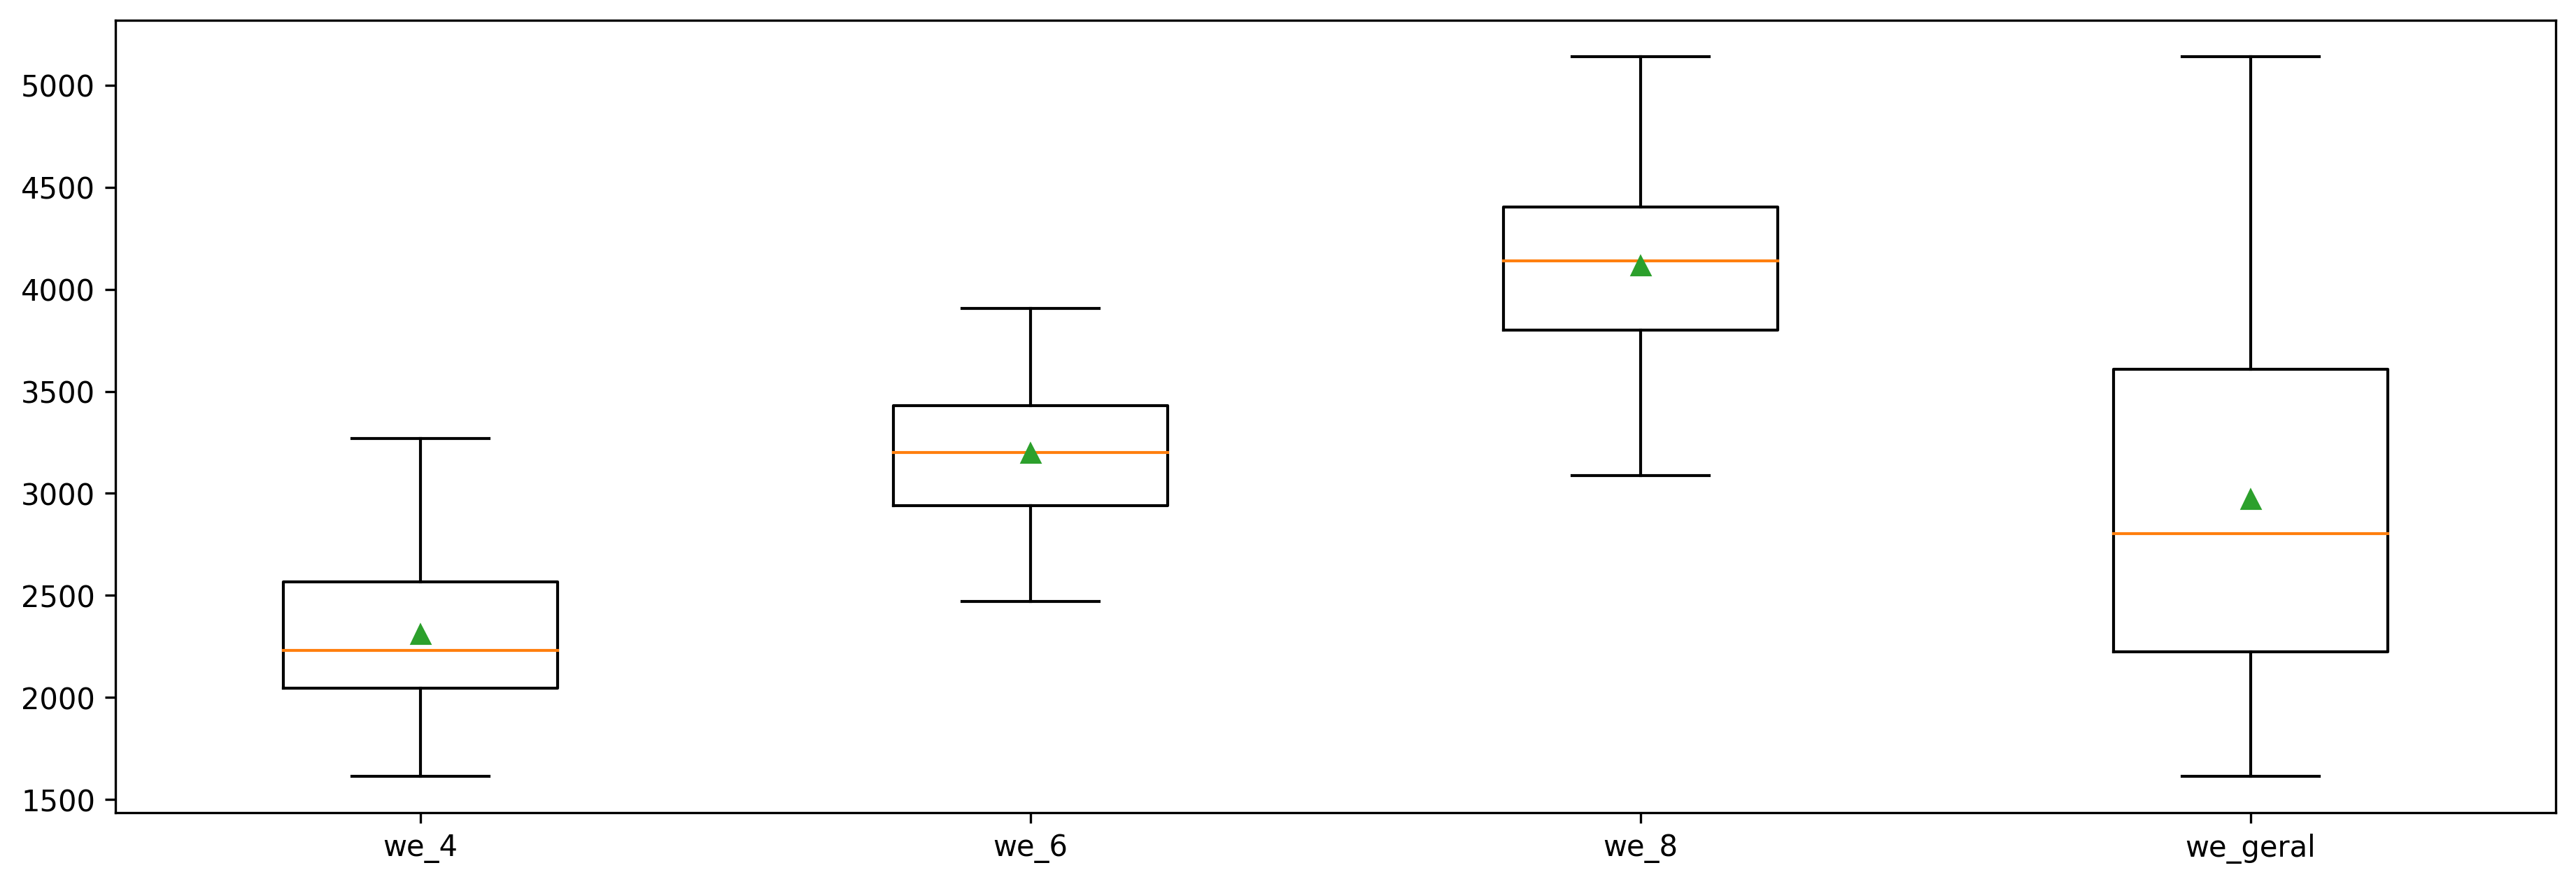

In [ ]:
# Análise  weight separado por cilindro 
plt.figure(1, figsize=(12, 6))

weight = [df.groupby('cylinders')['weight'].get_group(4), df.groupby('cylinders')['weight'].get_group(6), df.groupby('cylinders')['weight'].get_group(8), df['weight']]
plt.figure(figsize=(15,5), dpi=300)
plt.boxplot(weight, labels=['we_4', 'we_6', 'we_8', 'we_geral'], showmeans = True, whis = 1.5)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 144x144 with 0 Axes>

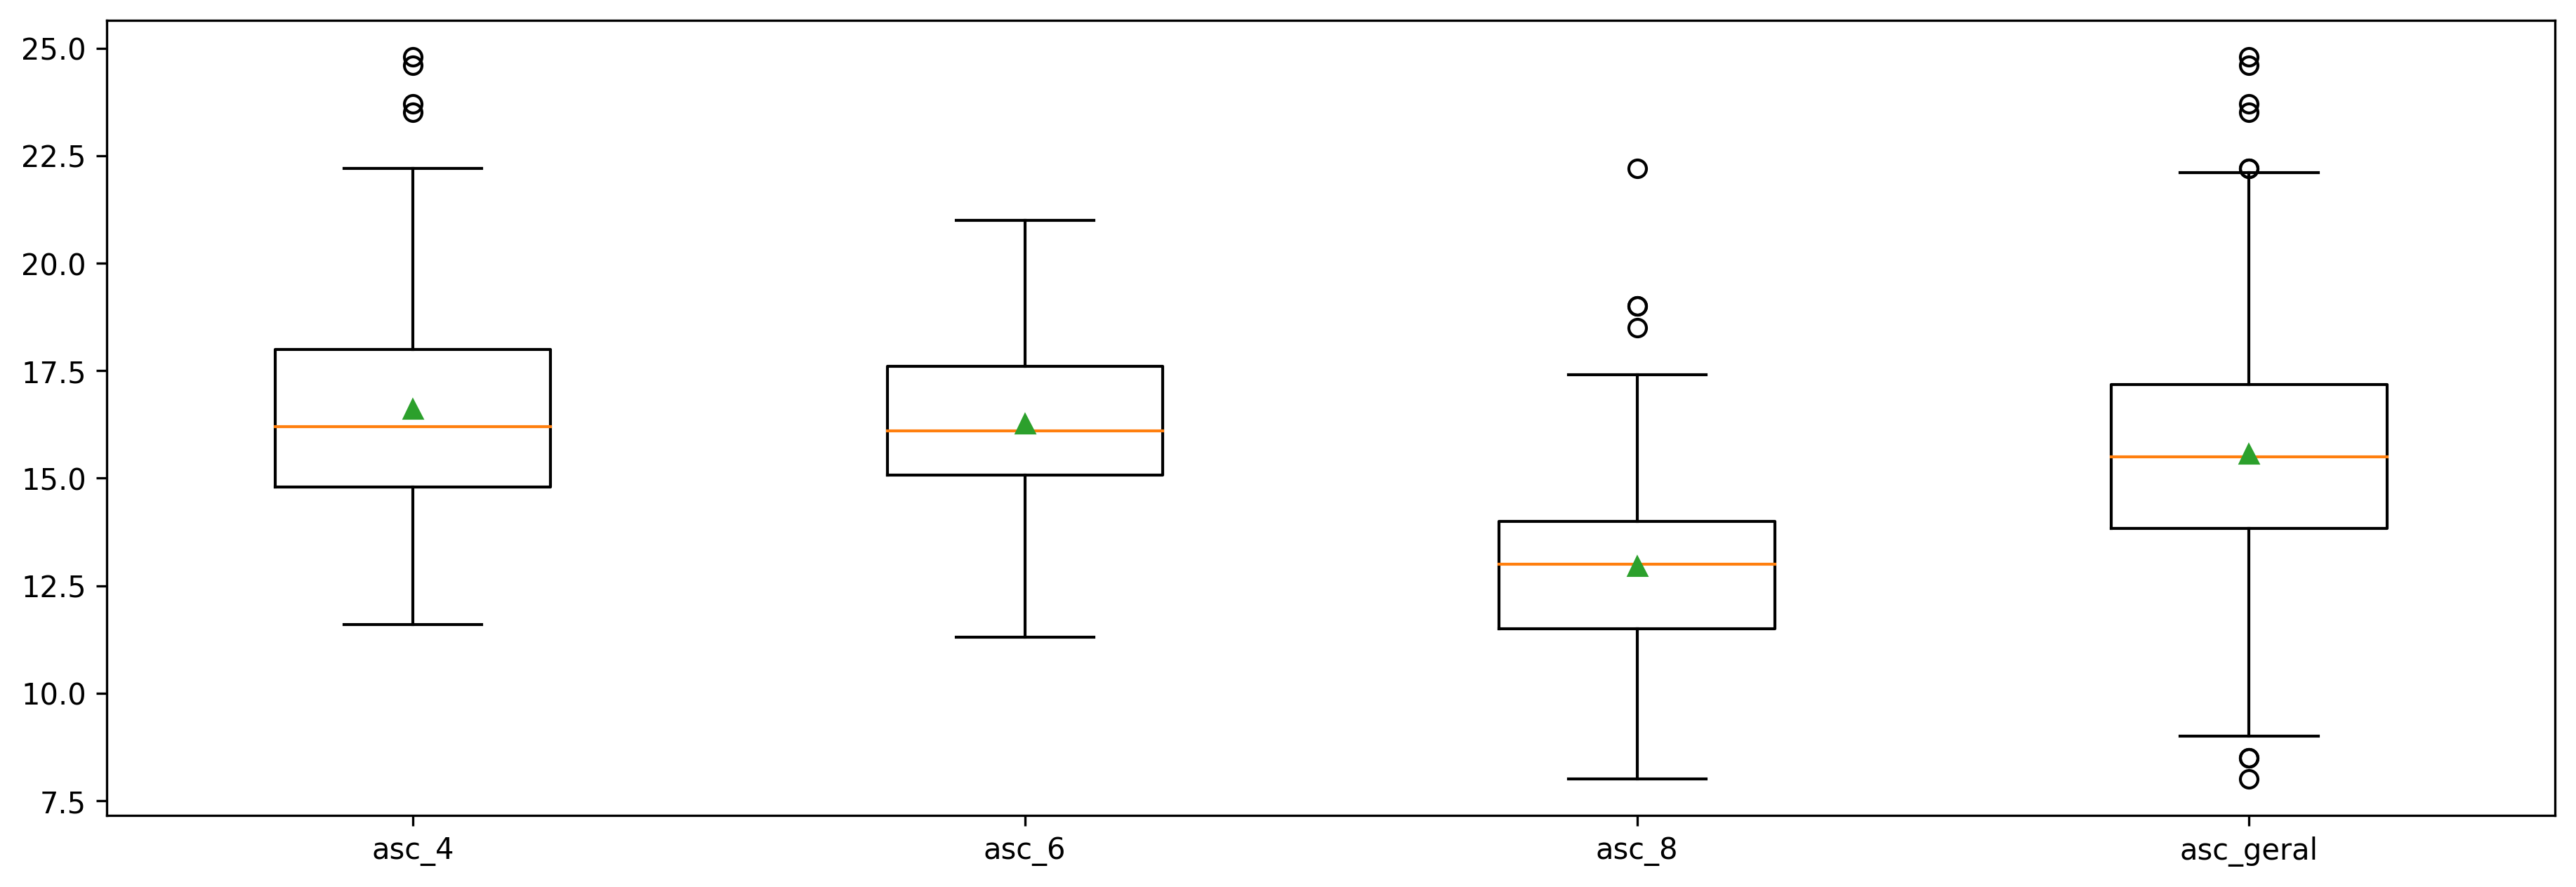

In [ ]:
plt.figure(figsize=(2, 2))

acceleration = [df.groupby('cylinders')['acceleration'].get_group(4), df.groupby('cylinders')['acceleration'].get_group(6), df.groupby('cylinders')['acceleration'].get_group(8), df['acceleration']]
plt.figure(figsize=(15,5), dpi=300)
plt.boxplot(acceleration, labels=['asc_4', 'asc_6', 'asc_8', 'asc_geral'], showmeans = True, whis = 1.5)
plt.show();

## 2- Create a new column with the weight/power ratio for each vehicle and plot a scatter plot of this column with the consumption column you created 

In [ ]:
df['Peso/Pot'] = (df['weight'])/(df['horsepower'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Marca,Nome carro,Consumo (Km/L),regiao mundial,zone,Peso/Pot
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet,chevelle malibu,7.652592,America do Norte,North America,26.953846
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick,skylark 320,6.377160,America do Norte,North America,22.381818
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth,satellite,7.652592,America do Norte,North America,22.906667
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc,rebel sst,6.802304,America do Norte,North America,22.886667
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford,torino,7.227448,America do Norte,North America,24.635714


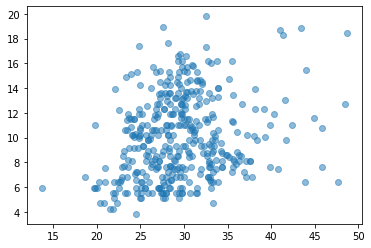

In [ ]:
X = df['Peso/Pot']
Y = df['Consumo (Km/L)']
plt.scatter(X,Y, alpha=0.5) # alpha é a transparência 
plt.show()

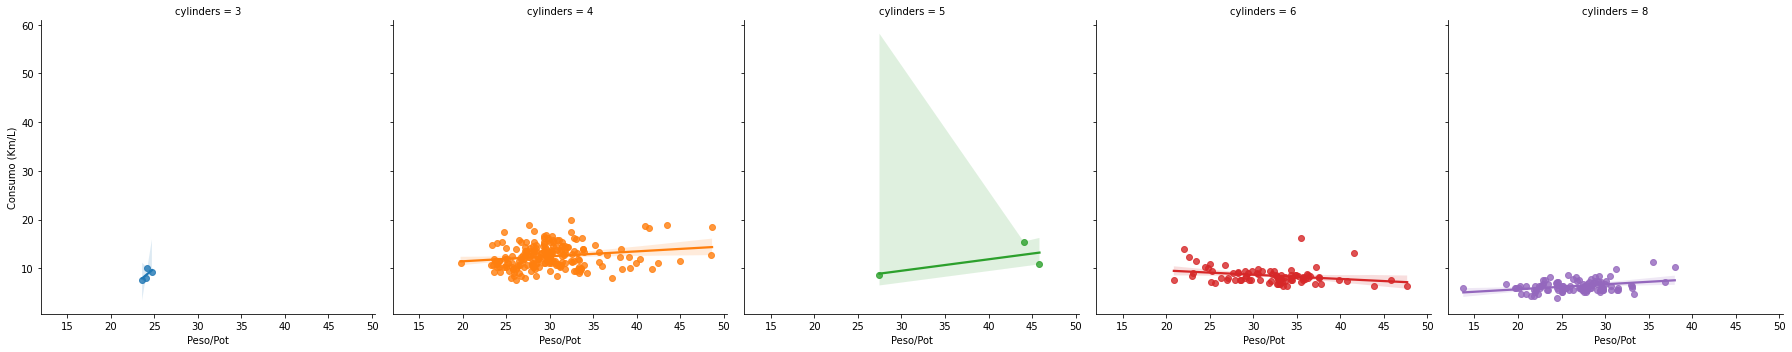

In [ ]:
#  Para entrarmos mais no detalhe poderíamos separar por cilindro 
#Os cilindros 3 e 5 não foram plotados porque as amostras são muito pequenas.
sn.lmplot(x = 'Peso/Pot', y ='Consumo (Km/L)', col = 'cylinders', hue='cylinders' ,
          data=df.loc[(df['cylinders']==3) |(df['cylinders']==4) | (df['cylinders']==5) |(df['cylinders']==6) | (df['cylinders']==8),:])

# Os cilindros de 3 e 5 tem uma amostragem muito pequena,  então não de